### Task 1: Data Exploration and Visualization

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load in the data into a Pandas data frame with read_csv() method
url_link = 'https://raw.githubusercontent.com/harslan/ISOM835/refs/heads/main/spam_data.csv'
df = pd.read_csv(url_link)
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,char_freq_$,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,1.5137,2.8159,6.5504,3.2063,0.5532,0.8791,1.0000,2.31,56,99,0
1,2.7282,3.3177,1.4234,2.9066,1.4556,2.2521,1.0000,6.33,64,195,0
2,0.2524,0.2521,0.8154,0.8517,2.0730,3.7233,0.6469,7.98,26,110,1
3,0.0620,0.4064,2.0215,1.3657,0.8021,0.5367,1.0000,11.33,38,66,0
4,1.1054,3.9071,3.3085,1.4933,0.3631,1.9053,1.0000,6.37,19,49,1


In [3]:
#Basic stats
display(df.describe())
display(df.info())
display(df.shape)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,char_freq_$,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.401930,1.931747,1.611665,1.550659,1.577493,1.504498,0.818827,19.077708,27.561800,76.054600,0.302600
std,1.022983,1.448324,1.270764,1.174797,1.191483,1.108019,0.296789,14.785136,20.550227,56.497264,0.459429
min,0.000500,0.001000,0.000800,0.000200,0.000400,0.000800,0.000300,0.000000,0.000000,0.000000,0.000000
25%,0.576975,0.780600,0.597925,0.615500,0.635075,0.618350,0.690025,7.620000,11.000000,30.000000,0.000000
50%,1.226250,1.641650,1.341200,1.330950,1.351550,1.282350,1.000000,15.955000,23.000000,66.000000,0.000000
75%,2.003375,2.776850,2.311575,2.219275,2.276825,2.173775,1.000000,27.130000,40.000000,110.000000,1.000000
max,6.631800,8.663000,11.257400,9.107500,9.502800,7.258800,1.000000,114.610000,148.000000,318.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              5000 non-null   float64
 1   word_freq_address           5000 non-null   float64
 2   word_freq_all               5000 non-null   float64
 3   word_freq_3d                5000 non-null   float64
 4   word_freq_our               5000 non-null   float64
 5   word_freq_over              5000 non-null   float64
 6   char_freq_$                 5000 non-null   float64
 7   capital_run_length_average  5000 non-null   float64
 8   capital_run_length_longest  5000 non-null   int64  
 9   capital_run_length_total    5000 non-null   int64  
 10  spam                        5000 non-null   int64  
dtypes: float64(8), int64(3)
memory usage: 429.8 KB


None

(5000, 11)

In [4]:
#Check for missing values
df.isnull().sum()

,0
word_freq_make,0
word_freq_address,0
word_freq_all,0
word_freq_3d,0
word_freq_our,0
word_freq_over,0
char_freq_$,0
capital_run_length_average,0
capital_run_length_longest,0
capital_run_length_total,0


<Axes: >

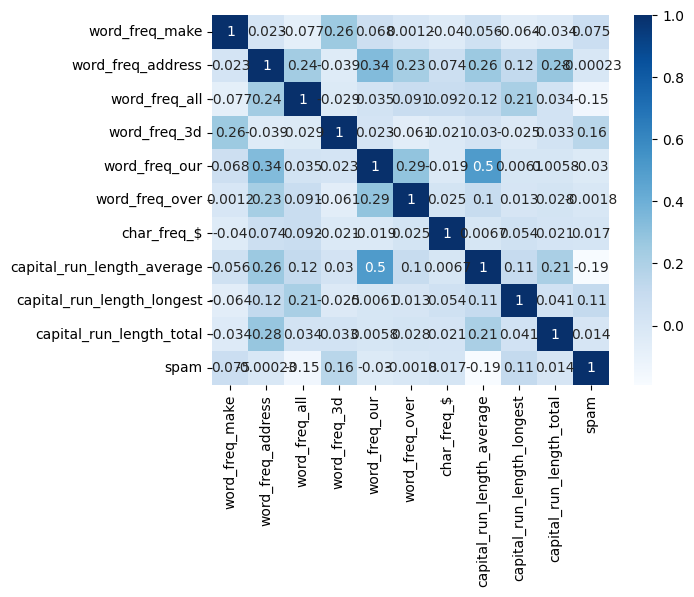

In [5]:
#Create and interpret a correlation matrix heatmap
sns.heatmap(df.corr(), annot=True, cmap='Blues')

This heatmap shows the correlation between different features in the datatset, visualized using a color gradient from light blue (negative correlation) to dark blue (postive correlation), with white indicating no correlation. The diagonal represents each feature's perfect correlation with itself.

Spam correlation:

capital_run_length_average has negative correlation with spam (-0.19), indicating that emails with longer in average capitalized sequences may not be perceived as spam.

capital_run_length_longest (0.11) and capital_run_length_total (0.014) both have possitive correlations with spam, indicating that emails with long sequences of capital letters are more likely to be spam.

Note: Spam has negative correlation with capital_run_length_average while has positive correlation with capital_run_length_longest. This can be explained that spam emails often contain long sequences of capital letters for emphasis and these are usually isolated rather than common throughout the email. Spam might use short bursts of capital letters to highlight specific points, leading to an increase in capital_run_length_longest rather than the average.

word_fred_all and spam has negative correlation of -0.15, meaning that emails with higher frequency of "all" tend to be non-spam.

word_freq_3d has possitive correlation with spam (0.16), suggesting that  the word "3d" is more common in spam email.


Feauture - Feature correlation:
- Capital_run_length_average and word_fred_our: have a strong possitive correlation of 0.5, indicating that emails with longer average capital sequences also contain the word "our" more frequently.


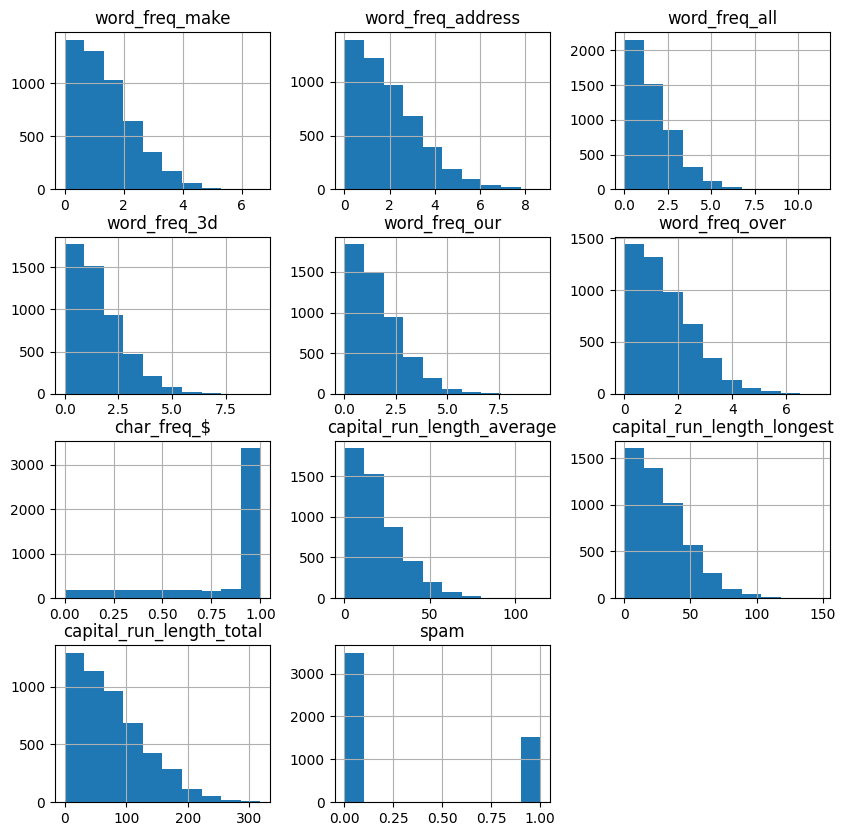

In [6]:
#Create histogram
df.hist(figsize=(10,10))
plt.show()


Many features have a skewed distribution, with the majority of the values are concentrated on the left, near 0, meaning that for most emails, certain words or patterns (like capital letters) appear infrequently.

The "spam" histogram shows that there is a significant imbalance between spam and non-spam emails. This could lead to the uneffectiveness of the model.

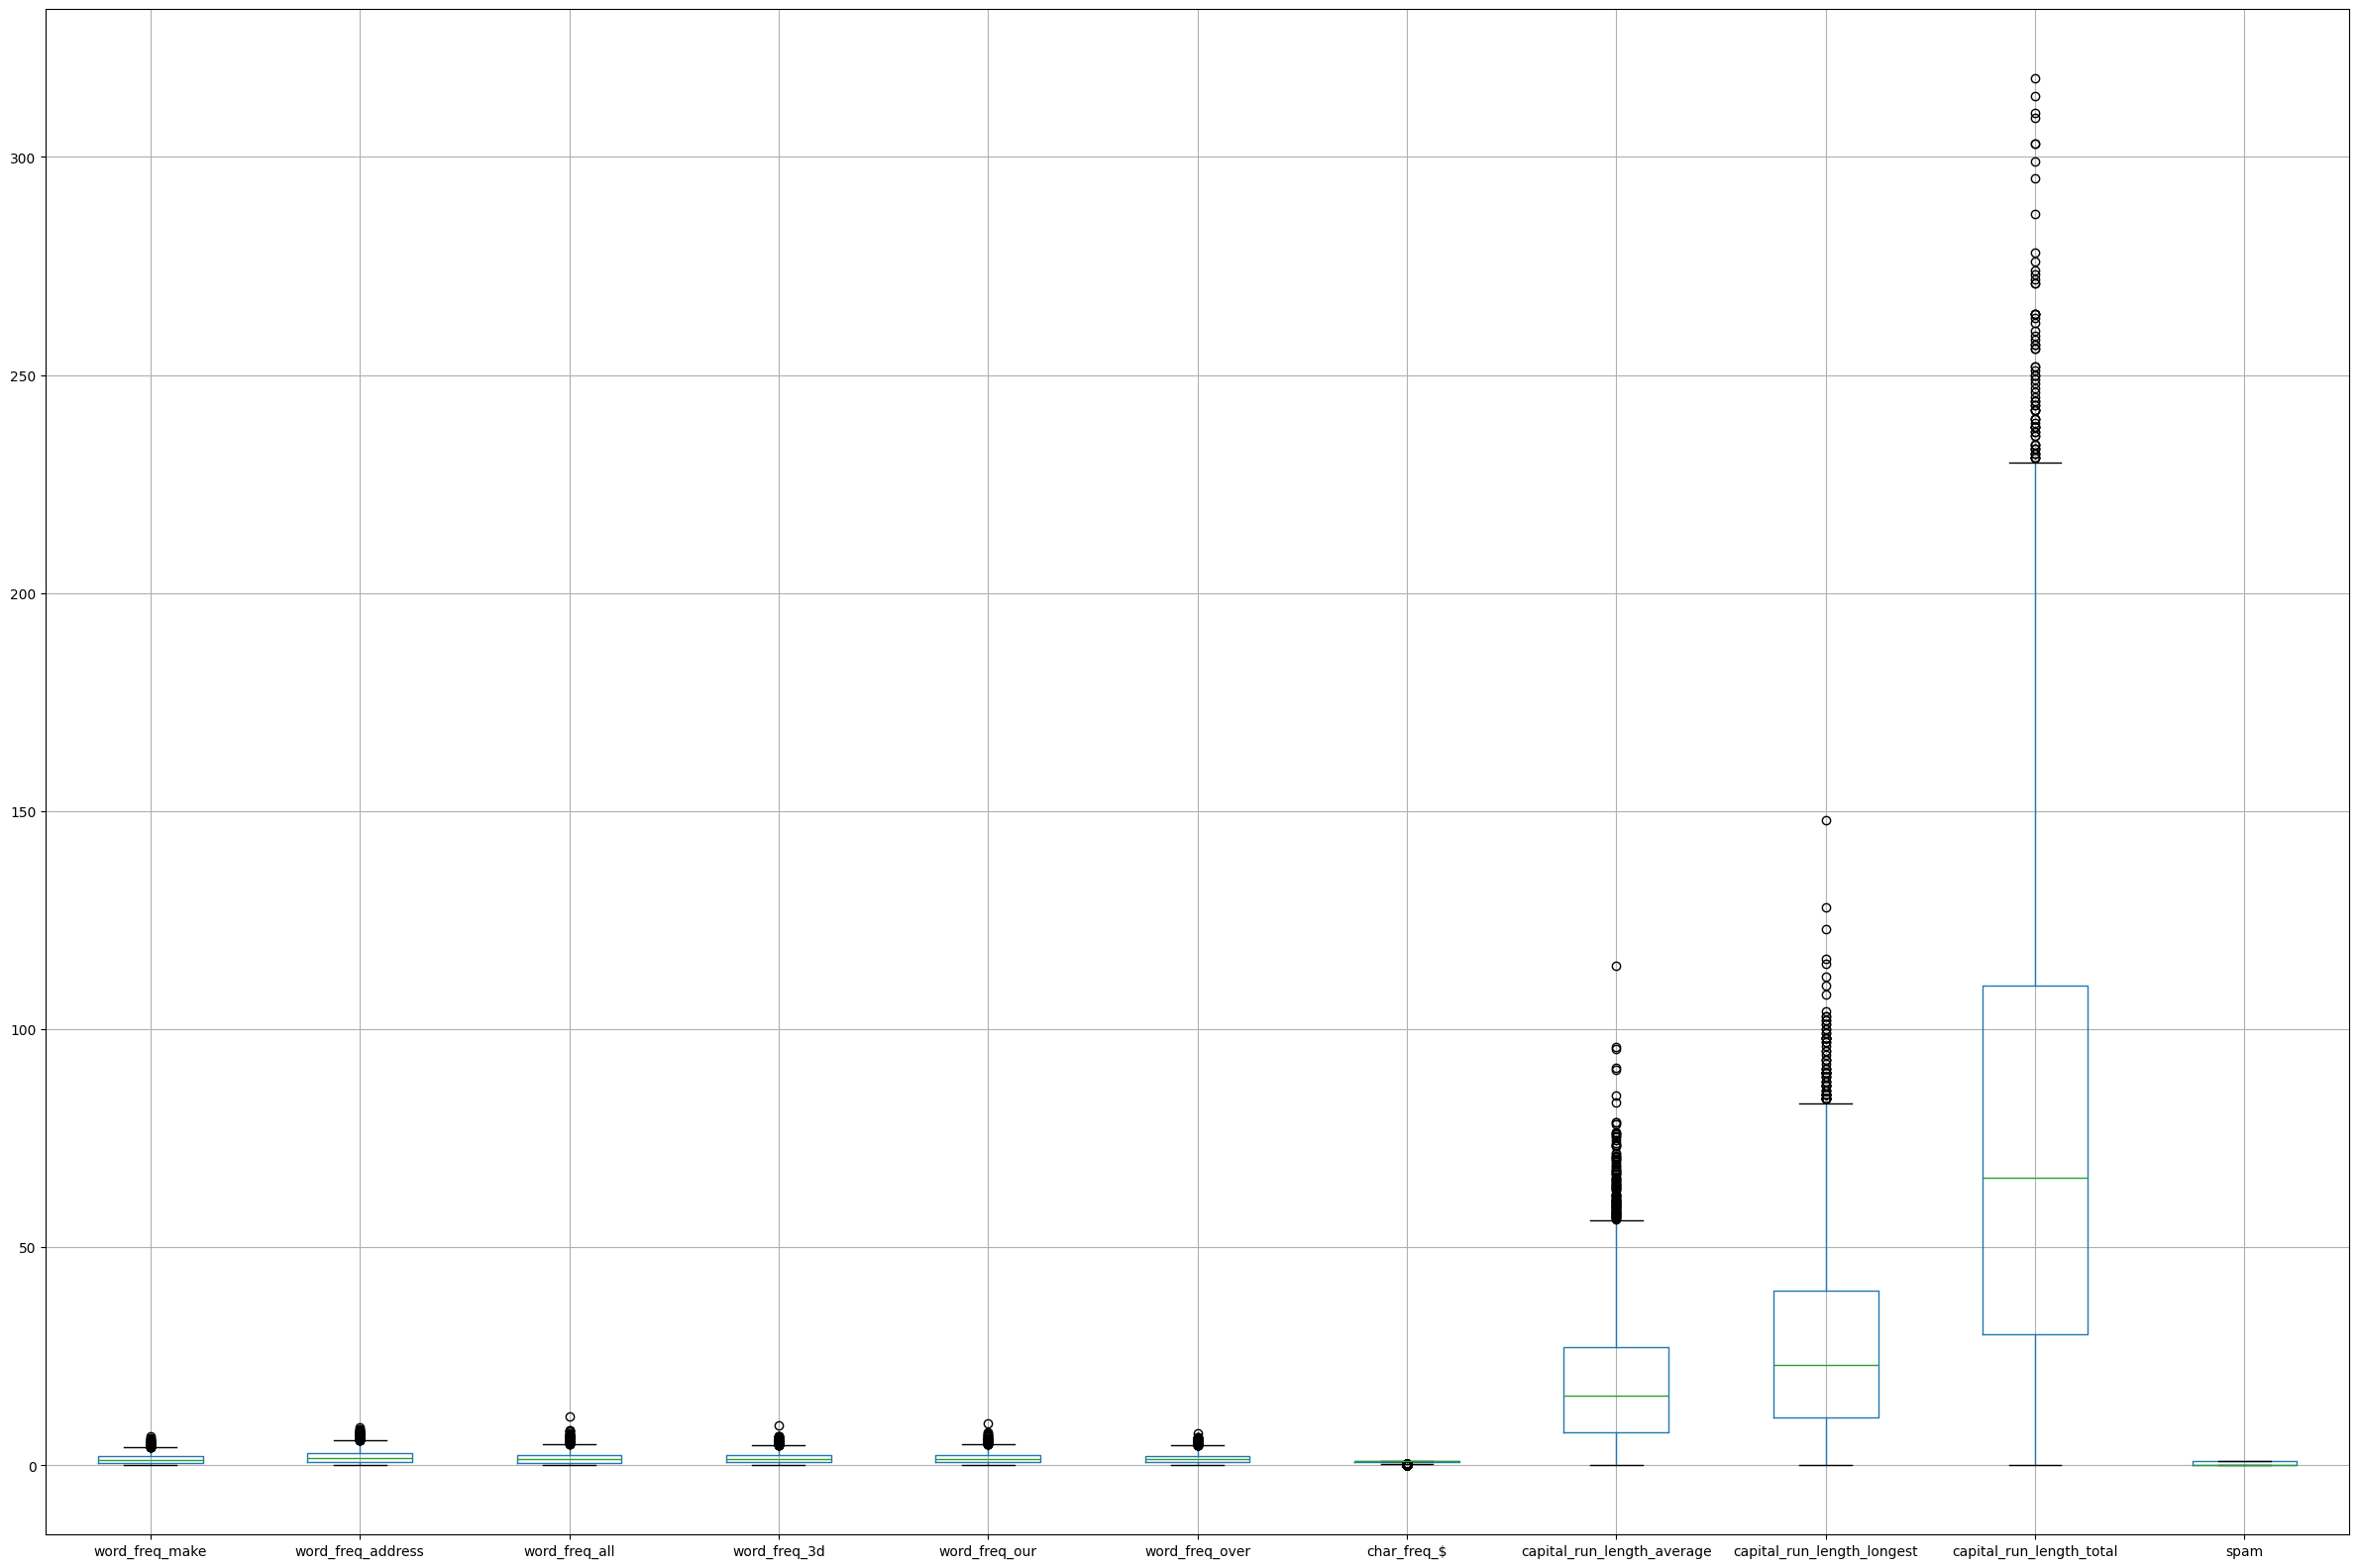

In [7]:
#Create Box plot
df.boxplot(figsize=(30,20))
plt.show()

### Task 2: Model Training and Evaluation

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import make_blobs

### Split the data into features (X) and target (y)

In [9]:
X = df.drop('spam', axis=1)  # Features (all columns except 'spam')
y = df['spam']  # Target (the 'spam' column)

### Create training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Import and train the Gaussian NB Classifier

In [11]:
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

### Make prediction

In [12]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [13]:
y_test

,spam
1501,0
2586,1
2653,1
1055,1
705,1
...,...
4711,1
2313,1
3214,0
2732,0


### Evaluate the model

Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       707
           1       0.54      0.34      0.42       293

    accuracy                           0.72      1000
   macro avg       0.65      0.61      0.62      1000
weighted avg       0.70      0.72      0.70      1000

Confusion Matrix:
 [[620  87]
 [192 101]]


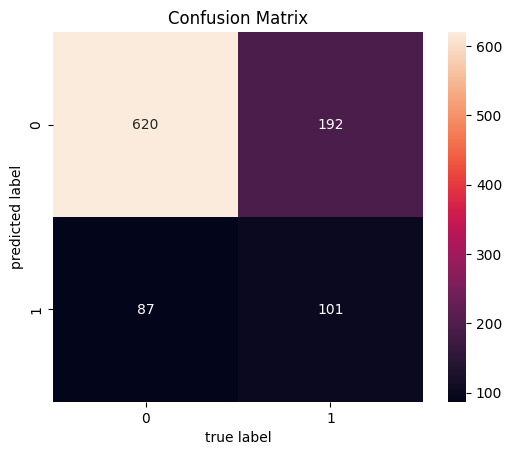

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

#Confusion matrix
mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', mat)

#Plotting the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar='False')
plt.title('Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()




### Interpret results

Classification report:

*   Class 0 (Non-Spam):

Precision: 0.76: meanings the model correctly predicted 76% of the emails as being non-spam.

Recall: 0.88: meaning out of all emails, the model correctly identified 88% of them.

F1-Score: 0.82: The harmonic mean of precision and recall indicates strong performance.

*   Class 1 (Spam):

Prcesion: 0.54: The model correctly predicted 54% out of all emails as spam.

Recall: 0.34: Out of all actual spam emails, the model correctly identified only 34% of them.

F1-Score:0.42 : The harmonic mean of precision and recall indicates weak performance.

Confusion matrix:

True Negatives (TN):620: The model correctly indentified 620 non-spam emails.

False Positive (FP):87: The model incorrectly identified 87 non-spam emails as spam.

False Negatives(FN):192: The model incorrectly identified 192 spam emails as non-spam.

True Positives (TP):101: The model correctly identified 101 spam emails.

Overall performance:

The model has overall accuracy of 72%, which means it correctly identifed 72% of the spam emails. Moreover, it is quite effective at identifying non-spam with high precision and recall, indicating it does not often misclassify spam email for non-spam email. However, the model significantly struggles with identifying spam as the precision rate for non-spam is quite low. The high number of false negatives (192 spam emails classified as non-spam) suggests that the model is missing a significant portion of actual spam.


### Task 3: Feature Importance Analysis

### Calculate mean and variance of each feature for both spam and non-spam emails

In [15]:
# Separate spam and non-spam emails
spam_emails = df[df['spam'] == 1]
non_spam_emails = df[df['spam'] == 0]

# Calculate mean and variance of each feature for both groups
features = df.columns[:-1]  # Exclude the 'spam' column
mean_spam = spam_emails[features].mean()
var_spam = spam_emails[features].var()

mean_non_spam = non_spam_emails[features].mean()
var_non_spam = non_spam_emails[features].var()

mean_diff = mean_spam - mean_non_spam

display(mean_spam)
display(mean_non_spam)
display(mean_diff)


,0
word_freq_make,1.519093
word_freq_address,1.931236
word_freq_all,1.326171
word_freq_3d,1.828901
word_freq_our,1.522549
word_freq_over,1.501396
char_freq_$,0.826351
capital_run_length_average,14.803985
capital_run_length_longest,31.085261
capital_run_length_total,77.217449


,0
word_freq_make,1.351093
word_freq_address,1.931969
word_freq_all,1.735541
word_freq_3d,1.429930
word_freq_our,1.601333
word_freq_over,1.505844
char_freq_$,0.815563
capital_run_length_average,20.932065
capital_run_length_longest,26.032980
capital_run_length_total,75.550043


,0
word_freq_make,0.167999
word_freq_address,-0.000733
word_freq_all,-0.409370
word_freq_3d,0.398970
word_freq_our,-0.078784
word_freq_over,-0.004448
char_freq_$,0.010789
capital_run_length_average,-6.128079
capital_run_length_longest,5.052281
capital_run_length_total,1.667406


# Create a Bar Plot to visualize the difference in means


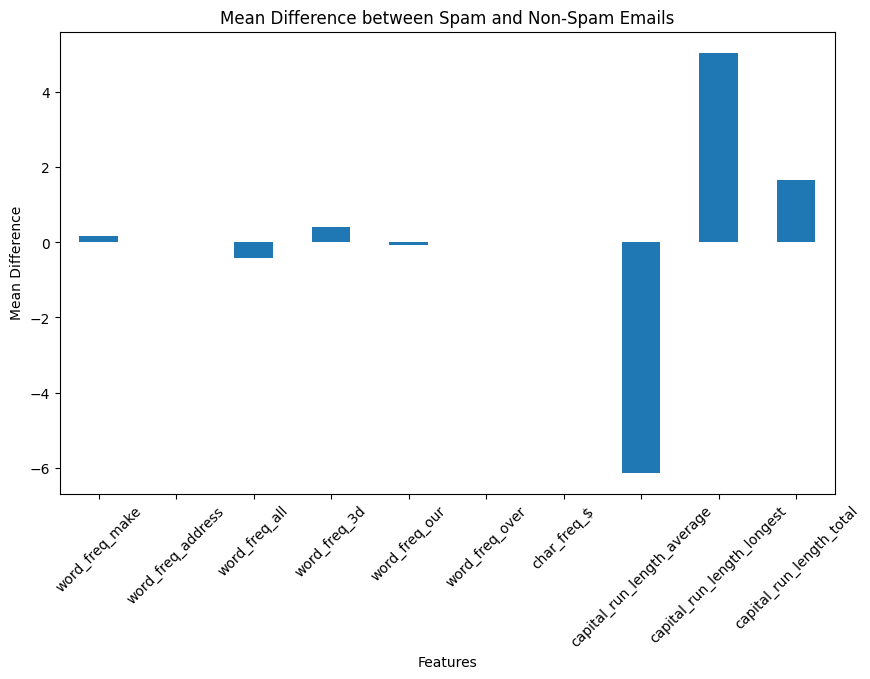

In [16]:
plt.figure(figsize=(10, 6))
mean_diff.plot(kind='bar')
plt.title('Mean Difference between Spam and Non-Spam Emails')
plt.xlabel('Features')
plt.ylabel('Mean Difference')
plt.xticks(rotation=45)
plt.show()

### Most important features for distinguishing Spam and Non-spam
*   Capital_run_length_average: the mean difference shows the largest negative figure (-6.128079), suggesting non-spam emails tend to use more restrained capitalization, making it notable for distinguishing the two classes.
*   Capital_run_length_longest: The mean difference of this feature is the highest positive (5.052281), indicating spam emails generally have longer longer sequences of capitalized text, making it a useful in classifying the two classes.
*   Capital_run_length_total: this feature has the second highest mean difference, indicating spam emails tend to have more capital letters than non-spam, which is a useful indicator.


### Top 5 Features
*   Capital_run_length_average (as analyzed above)
*   Capital_run_length_longest (as analyzed above)
*   Capital_run_length_total (as analyzed above)
*   Word_freq_all: from the bar plot, this feature also shows notable negative difference in mean, indicating spam emails contain the word "all" less often than non-spam emails.
*   Word_freq_3d: there is a notable positive difference in mean for this feature, suggesting that spam emails use the word "3d" more frequently than non-spam emails.









### Task 4: Real - word Application and Refection


### Identify misclassified emails from test set

In [17]:
y_true = y_test
misclassified_indices = np.where(y_pred != y_true)[0]

misclassified_emails = X_test.iloc[misclassified_indices]
misclassified_true_labels = y_true.iloc[misclassified_indices]
misclassified_labels = y_pred[misclassified_indices]

display('List of misclassified emails', misclassified_emails)
display('List of misclassified true labels', misclassified_true_labels)
display(misclassified_labels)

FN_indices = np.where((y_true == 1) & (y_pred == 0))[0]
FP_indices = np.where((y_true == 0) & (y_pred == 1))[0]

FN_true_labels = y_true.iloc[FN_indices]
print("True Labels of False Negatives:\n", FN_true_labels)

FP_true_labels = y_true.iloc[FP_indices]
print("True Labels of False Positives:\n", FP_true_labels)

'List of misclassified emails'

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,char_freq_$,capital_run_length_average,capital_run_length_longest,capital_run_length_total
2586,1.9236,0.7053,1.5514,1.5003,0.3710,0.8446,0.8969,3.29,28,103
705,0.5771,0.7284,1.7944,0.0882,0.9838,0.9144,1.0000,10.08,2,55
2413,2.9370,0.7207,1.6144,3.3875,0.1264,1.2987,0.8864,30.26,32,26
1744,1.5581,0.2553,0.4546,0.2109,1.1475,0.3931,0.2044,5.52,3,5
1084,2.9516,1.1977,0.9374,0.0273,0.6222,1.7990,1.0000,10.82,7,6
...,...,...,...,...,...,...,...,...,...,...
1268,0.3164,4.2359,0.7233,3.6422,0.9261,3.4402,1.0000,4.59,42,121
4424,1.3423,2.4568,1.2429,0.5641,2.1834,1.3820,0.0592,19.03,23,19
4711,0.2162,2.9310,2.0389,0.1514,0.1732,1.4102,1.0000,1.34,13,25
2313,2.0898,0.0523,1.6047,1.3173,1.6172,0.7480,1.0000,6.96,5,53


'List of misclassified true labels'

,spam
2586,1
705,1
2413,0
1744,1
1084,0
...,...
1268,0
4424,1
4711,1
2313,1


array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

True Labels of False Negatives:
 2586    1
705     1
1744    1
642     1
4767    1
       ..
4849    1
944     1
4424    1
4711    1
2313    1
Name: spam, Length: 192, dtype: int64
True Labels of False Positives:
 2413    0
1084    0
2515    0
29      0
838     0
       ..
3148    0
2775    0
192     0
1268    0
3214    0
Name: spam, Length: 87, dtype: int64


### Select 3 misclassified emails from test set

### Email No.2588: False negative (Spam classified as non-spam)

* Features values:

word_freq_make: 1.9236

word_freq_address: 0.7053

word_freq_all: 1.5514

word_freq_3d: 1.5003

word_freq_our: 0.3710

word_freq_over: 0.8446

char_freq_$: 0.8969

capital_run_length_average: 3.29

capital_run_length_longest: 28

capital_run_length_total: 103

* Unusual features:

word_freq_all: 1.5514. Relatively high frequency, making the model confuse with non-spam emails.

word_freq_3d: 1.5003. Moderate occurence, not clear enough for the model.

capital_run_length_longest: 28. This value is not extreme enough to signal a clear spam classification.

* Reason for misclassification: some spam-related features such as the use of capital letters and certain words were not strong enough to signal spam.

### Email No.1270: False Positive (Non-spam classied as spam)

* Features values:

word_freq_make: 0.3164

word_freq_address: 4.2359

word_freq_all: 0.7233

word_freq_3d: 3.6422

word_freq_our:0.9261

word_freq_over: 3.4402

char_freq_$: 1.0000

capital_run_length_average: 4.59

capital_run_length_longest: 42

capital_run_length_total: 121

* Unusual features:
word_freq_address: 4.2359. This value is quite high. Even though the difference between spam and non-spam for this feature is minimal, a high frequency of this word may have contributed to the misclassification as it coul be mistaken for a phising attempt.

word_freq_3d: 3.6422.This email has high frequency of the word "3d", which is a notable sign of spam email.

capital_run_length_longest: 42. This is a relative long run of consecutive capital letters, which is typically associated with spam emails, as spammers often use capitalization to emphasize certain phrases or attract attention.

capital_run_length_total: 121. A high total capital letter count, indicating a signal for spam. This makes the model misclassified this email.

* Reason for misclassification: The combination of the word "3d"'s high frequency and the relatively long run of consecutive capital letters made this email look like spam, even though it was not. The model likely focused on these spam-associated features and misclassified the email.



### Email No.707: False Negative (Spam classied as non-spam)

* Features values:

word_freq_make: 0.5771

word_freq_address: 0.7284

word_freq_all: 1.7944

word_freq_3d: 0.0882

word_freq_our:0.9838

word_freq_over: 0.9144

char_freq_$: 1.0000

capital_run_length_average:10.08

capital_run_length_longest: 2

capital_run_length_total: 55

* Unusual features:

capital_run_length_longest: 2. The value is quite low, indicating that this email does not contain longer sequence of capital letters, which is often a characteristic of spam.

capital_run_length_total: 55. This value is relatively low, meaning there isn' much emphasis on capital letters overall, which is another common feature of spam email.

* Reason for misclassification: The model incorrectly classified this email as non-spam likely due to its low capital letter usage (both in term of length and total).


### Brieft Report


False Positives vs. False Negatives:

Both False positives (non-spam classified as spam) and false negatives (spam classified as non-spam) impact the effectiveness of the model. However, false negatives are generally worse because the model allows spam emails to reach the user, posing potential security risks and reducing user trust. On the other hand, false positives can be an annoyance but typically don't pose a security threat.

Key Limitations/Issues:

Imbalanced Dataset: Bias in the model predictions could arise as there are more non-spam emails compared to spam emails (707 vs 293) in the data set. Thus, the model is likely to classify an email as a non-spam leaving spam out (false negatives) very often.

Feature Overlap: As certain features might be common in both spam and non-spam emails, the model could struggle to differentiate between spam and non-spam emails. For example, certain words or symbols might appear in both types of emails, leading to misclassification.

Next steps to improve the performance of the model:

Data Balancing:
Employ techniques such as oversampling the minority class (spam) or under sampling the majority class (non-spam) to balance the dataset. This will help the model to better recognize patterns in spam emails.

Features engineering:
Identify new feature sets that capture the distinction of spam over non-spam with more nuance and remove those that add noises.

Advanced Models:
Initiate an investigation into a more advance model to improve the performance.


